In [296]:
import os
current_directory = os.getcwd() # 현재 작업 디렉토리를 얻기
print("현재 작업 디렉토리:", current_directory)

현재 작업 디렉토리: C:\apps\miniproj


In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지 제거
import warnings
warnings.filterwarnings('ignore')

In [298]:
# 데이터 불러오기
M = pd.read_csv('./month_data.csv', encoding='euc-kr', index_col=0)

In [299]:
M

,날짜,경제심리지수(순환변동치),뉴스심리지수,소비자심리지수,외국인 보유금액(조),외환보유액(천달러),미국M2,한국M2(십억원),한국금리,미국금리,경상수지,원달러종가,원달러시가
0,10-Jan,113.6,112.74,116.5,281.9,268917449,8479.15,1574215.8,2.0,0.13,1776.4,1156.5,1166.08
1,10-Feb,114.3,104.80,114.0,277.6,265865270,8487.28,1595403.8,2.0,0.13,322.4,1158.4,1159.80
2,10-Mar,114.7,107.75,113.9,300.8,267567135,8566.14,1607896.1,2.0,0.13,917.1,1130.8,1158.00
3,10-Apr,115.0,110.18,113.6,315.8,274143774,8611.55,1621176.9,2.0,0.13,796.9,1115.5,1129.95
4,10-May,115.1,107.73,113.7,294.4,265595927,8577.66,1630904.7,2.0,0.13,6650.4,1200.2,1109.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,23-Mar,92.2,93.66,92.0,648.7,401730032,21059.53,3811138.9,3.5,4.88,158.1,1303.8,1323.44
159,23-Apr,92.2,96.85,95.1,660.6,402190255,20920.88,3793259.9,3.5,4.88,792.6,1339.9,1306.47
160,23-May,92.4,96.80,98.0,692.2,396787900,20726.76,3785013.0,3.5,5.13,1927.2,1322.2,1338.17
161,23-Jun,92.7,100.60,100.7,690.3,397202408,20806.15,3801207.0,3.5,5.13,5873.7,1312.8,1322.33


- 변수 몇가지는 변동률로
- 단위 통일?
- 다중공선성 확인 해결
- feature selection
- 이상치 결측치
- regression 경사하강법 등
- 평가지표

In [300]:
mdate = M['날짜']

In [301]:
y = M['원달러종가']
X = M.drop(['날짜','원달러종가'], axis=1)

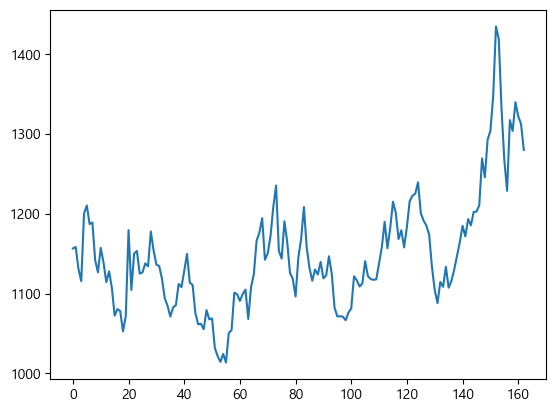

In [302]:
plt.plot(y.index, y.values)

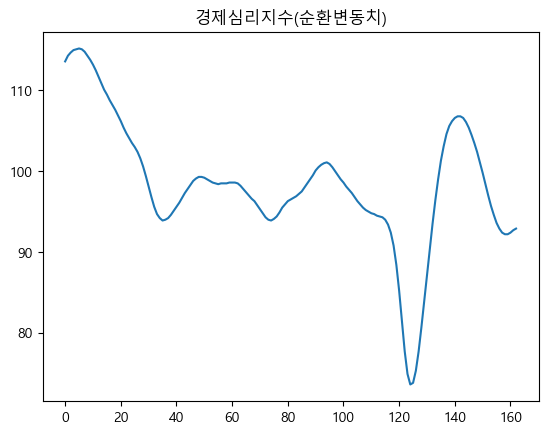

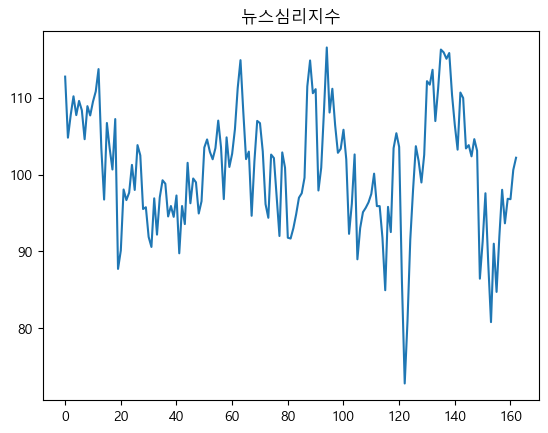

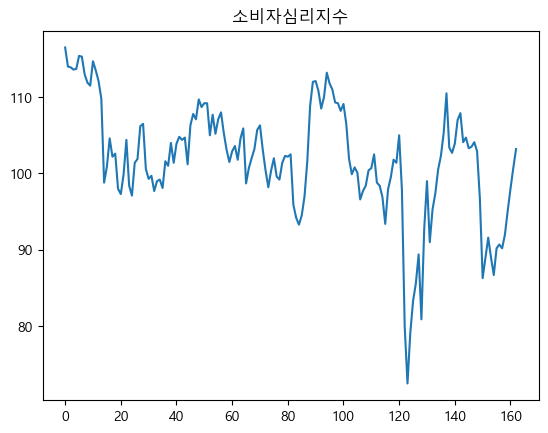

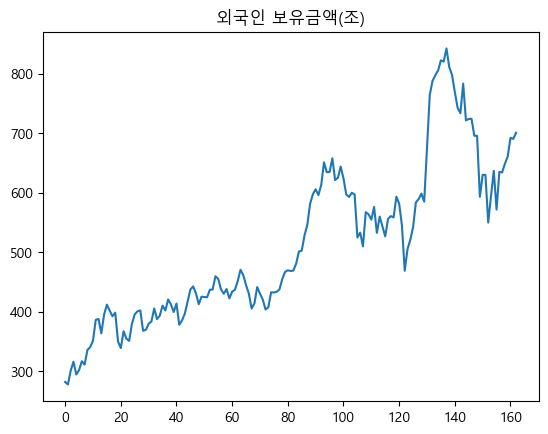

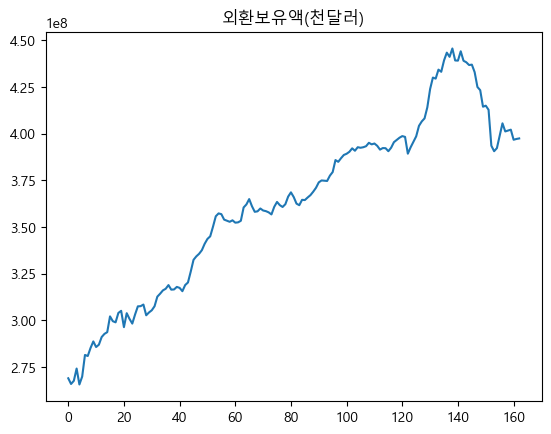

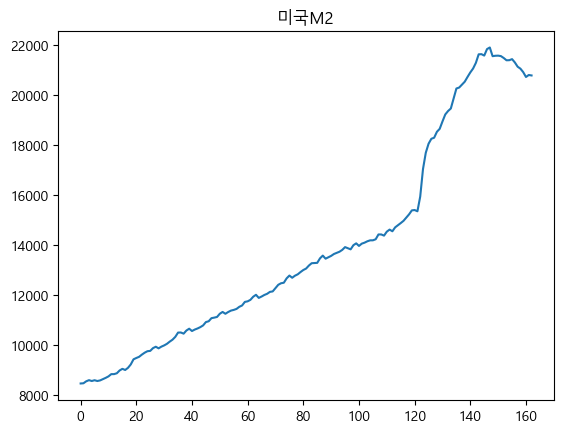

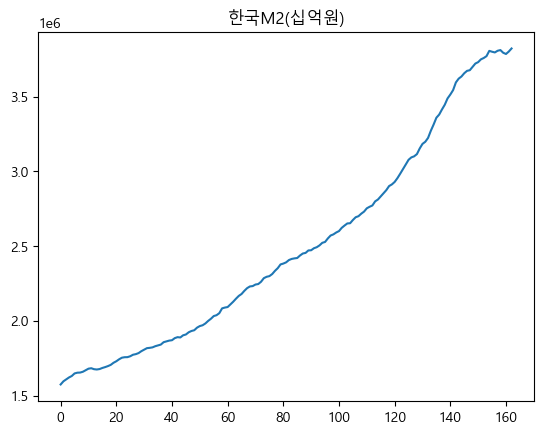

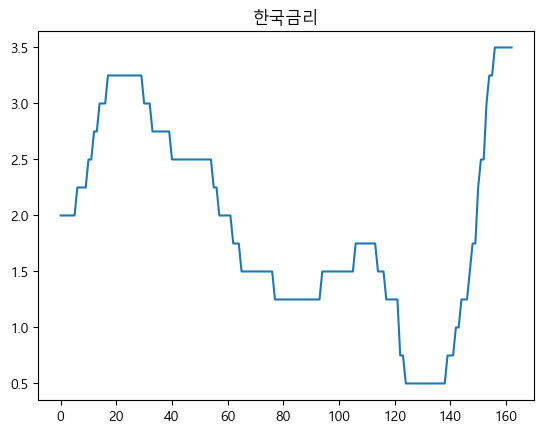

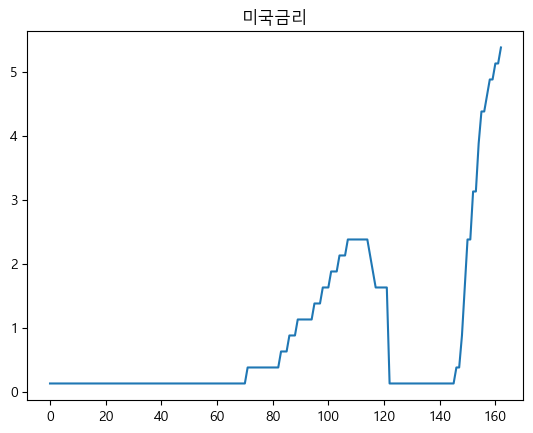

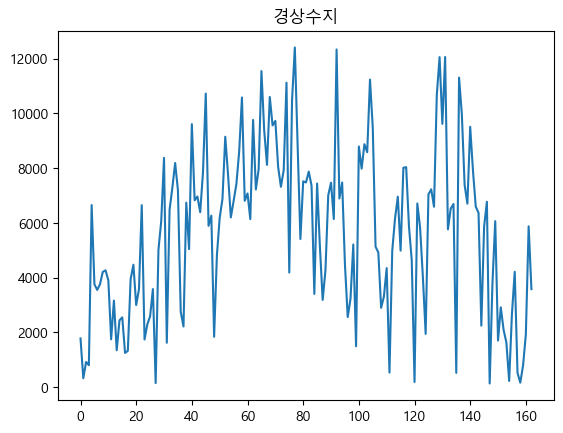

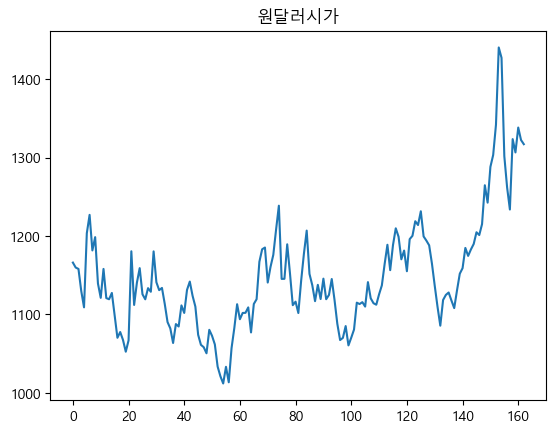

In [303]:
for i in range(len(X.columns)):
    plt.plot(X.index, X[X.columns[i]])
    plt.title(X.columns[i])
    plt.show()

# 외국인보유금액, 외환보유액, 미국M2, 한국M2에 추세가 있으니 차분을 한다.

<Axes: >

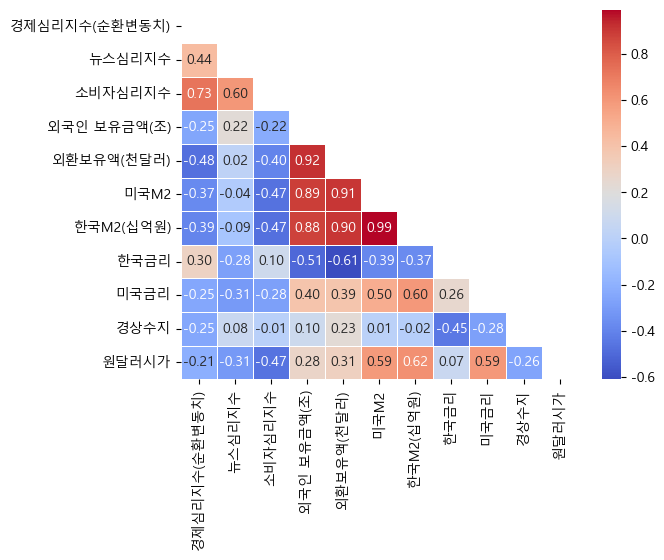

In [304]:
# 변수에 따라서 다중공정성없애기 
# 다중공정성으로 CD 91물, 달러엔 제외 
corr_data = X[X.columns].corr()
mask = np.triu(np.ones_like(corr_data, dtype=bool))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', mask=mask)

# 다중공선성 문제 해결하기
- PCA principal Component Analysis 주성분분석
- PLS 회귀분석 Partial Least Squa
- OLS 회귀분석
- 능형 회귀분석 Ridge
- 표본크기 증가
- 차분 혹은 로그변환
- 명목은 실질변수로
- 해당 변수 제거
- 다른 변수 대체
# 다중공선성 확인 
- 산포도 및 상관계수 확인 > 0.9
- 허용/공차 tolerance
- 분산팽창지수 VIF Variance Inflation Factor

- 각 변수에 추세 trend가 있는지 확인 차분하기
- standardscaler?
- crossvalidation도

In [305]:
import numpy as np
import matplotlib.pyplot as plt

In [306]:
X

,경제심리지수(순환변동치),뉴스심리지수,소비자심리지수,외국인 보유금액(조),외환보유액(천달러),미국M2,한국M2(십억원),한국금리,미국금리,경상수지,원달러시가
0,113.6,112.74,116.5,281.9,268917449,8479.15,1574215.8,2.0,0.13,1776.4,1166.08
1,114.3,104.80,114.0,277.6,265865270,8487.28,1595403.8,2.0,0.13,322.4,1159.80
2,114.7,107.75,113.9,300.8,267567135,8566.14,1607896.1,2.0,0.13,917.1,1158.00
3,115.0,110.18,113.6,315.8,274143774,8611.55,1621176.9,2.0,0.13,796.9,1129.95
4,115.1,107.73,113.7,294.4,265595927,8577.66,1630904.7,2.0,0.13,6650.4,1109.05
...,...,...,...,...,...,...,...,...,...,...,...
158,92.2,93.66,92.0,648.7,401730032,21059.53,3811138.9,3.5,4.88,158.1,1323.44
159,92.2,96.85,95.1,660.6,402190255,20920.88,3793259.9,3.5,4.88,792.6,1306.47
160,92.4,96.80,98.0,692.2,396787900,20726.76,3785013.0,3.5,5.13,1927.2,1338.17
161,92.7,100.60,100.7,690.3,397202408,20806.15,3801207.0,3.5,5.13,5873.7,1322.33


In [307]:
# X[X.columns[6]] = X[X.columns[6]] / 1000

In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [309]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('weight:', lr_model.coef_)
print('bias:', lr_model.intercept_)
# 이건 뭐에 대한 score 인가?? 
score =lr_model.score(X_test, y_test)

print('선형회귀 모델 R2: {0:.2f}'.format(score))
score

weight: [ 5.96375933e-01 -6.91581564e-01  2.94854861e-02 -1.84899753e-01
 -1.02365209e-06 -1.82821201e-02  2.54513074e-04 -1.57780181e+00
 -1.10697935e+01  5.43077110e-04  4.47953377e-01]
bias: 738.1316675719501
선형회귀 모델 R2: 0.90


0.9001748892940761

In [310]:
# Cofficient 값을 버리고, 부호만 살리는건 어때요??
coef=pd.Series(data=np.round(lr_model.coef_,5), index=X.columns)
coef

경제심리지수(순환변동치)     0.59638
뉴스심리지수           -0.69158
소비자심리지수           0.02949
외국인 보유금액(조)      -0.18490
외환보유액(천달러)       -0.00000
미국M2             -0.01828
한국M2(십억원)         0.00025
한국금리             -1.57780
미국금리            -11.06979
경상수지              0.00054
원달러시가             0.44795
dtype: float64

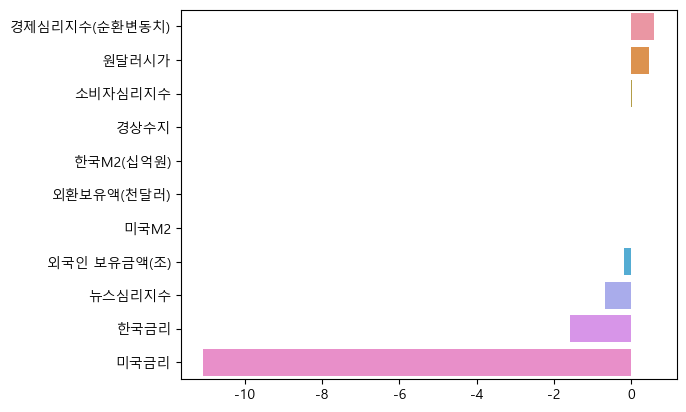

In [311]:
# 이 시각화는 왜 이모냥인겁니까?? 
coef_sort=coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.show()
# 단위가 달라서 회귀계수는 큰 의미 없다.

In [312]:
coef_sort

경제심리지수(순환변동치)     0.59638
원달러시가             0.44795
소비자심리지수           0.02949
경상수지              0.00054
한국M2(십억원)         0.00025
외환보유액(천달러)       -0.00000
미국M2             -0.01828
외국인 보유금액(조)      -0.18490
뉴스심리지수           -0.69158
한국금리             -1.57780
미국금리            -11.06979
dtype: float64

In [313]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    r2=r2_score(y_test, y_pred)
    print('MSE:{0:3f}, RMSE:{1:.3f}, r2:{2:.3f}'.format(mse,rmse,r2))

y_pred=lr_model.predict(X_test)
printRegressorResult(y_test,y_pred)

MSE:644.254992, RMSE:25.382, r2:0.900


In [314]:
result=pd.DataFrame({'y':y_test.values,'y_pred':y_pred, 'diff':np.abs(y_test.values-y_pred)})
result.sort_values(by=['diff'], ascending=False)

,y,y_pred,diff
6,1228.7,1290.031558,61.331558
25,1331.5,1383.585733,52.085733
13,1166.3,1121.606857,44.693143
18,1347.5,1308.030169,39.469831
29,1339.9,1304.175642,35.724358
7,1031.7,1064.646270,32.946270
3,1013.6,1046.382177,32.782177
21,1052.6,1085.324878,32.724878
16,1114.6,1086.330079,28.269921
10,1071.7,1099.405076,27.705076


<Axes: >

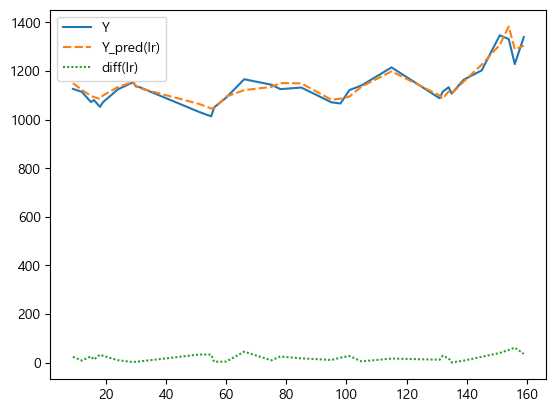

In [315]:
# 에측결과 시각화, 왜 에러가 날까요??
y_pred = lr_model.predict(X_test)
lr_df = pd.DataFrame(data={'Y':y_test, 'Y_pred(lr)':y_pred,'diff(lr)':np.round(np.abs(y_test-y_pred),2)})
sns.lineplot(data=lr_df)

In [316]:
# 의사결정회귀
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

score=tree_model.score(X_test,y_test)
print('의사결정회귀 R2: {0:.2f}'.format(score))

의사결정회귀 R2: 0.74


In [317]:
y_pred = tree_model.predict(X_test)

tree_df = pd.DataFrame(data = {'Y': y_test, 'Y_pred(tree)':y_pred, 'diff(tree)':np.round(np.abs(y_test-y_pred),2)} )
tree_df.sort_values(by=['diff(tree)'],ascending=False).head(10)

,Y,Y_pred(tree),diff(tree)
154,1331.5,1434.8,103.3
132,1114.6,1179.5,64.9
78,1125.7,1190.6,64.9
101,1121.7,1062.1,59.6
115,1215.2,1156.8,58.4
156,1228.7,1280.0,51.3
85,1132.1,1182.0,49.9
29,1153.8,1104.5,49.3
51,1031.7,1079.2,47.5
105,1140.6,1096.3,44.3


<Axes: >

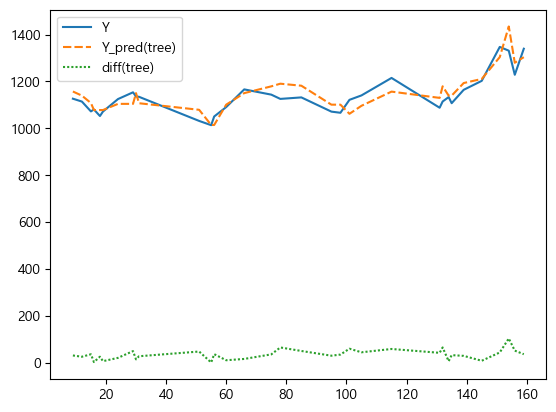

In [318]:
# 이거 PPT 에 사용하면 좋겠슴당!! 
sns.lineplot(data=tree_df)

In [319]:
!pip install lightgbm


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [320]:
# 이건 왜 다 같은 값이 나올까요?? 
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [321]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

In [322]:
model_list = [forest_model, lgb_model, xgb_model]
for model in model_list:
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_name = model.__class__,__name__
    print('{0} 모델 R2: {1:.2f}'.format(model_name,score))

(<class 'sklearn.ensemble._forest.RandomForestRegressor'>, '__main__') 모델 R2: 0.87
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 419
[LightGBM] [Info] Number of data points in the train set: 130, number of used features: 11
[LightGBM] [Info] Start training from score 1151.848466
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

In [323]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test, y_pred)
    print('MSE:{0:.3f}, RMSE:{1:.3f}, r2:{2:.3f}'.format(mse, rmse, r2))

In [324]:
# 이건 왜 에러가 날까요?
model_list=[lr_model, tree_model, forest_model, lgb_model, xgb_model]

for model in model_list:
    y_preds = model.predict(X_test)
    print('{0} 모델'.format(model.__class__.__name__))
    printRegressorResult(y_test, y_preds)

LinearRegression 모델
MSE:644.255, RMSE:25.382, r2:0.900
DecisionTreeRegressor 모델
MSE:1657.654, RMSE:40.714, r2:0.743
RandomForestRegressor 모델
MSE:810.963, RMSE:28.477, r2:0.874
LGBMRegressor 모델
MSE:1187.602, RMSE:34.462, r2:0.816
XGBRegressor 모델
MSE:1212.923, RMSE:34.827, r2:0.812


In [325]:
from sklearn.feature_selection import SelectKBest, f_regression

X_selected=SelectKBest(score_func= f_regression, k=5)
X_selected.fit_transform(X,y)
features = X.columns[X_selected.get_support()]
print('features={}'.format(features))

features=Index(['소비자심리지수', '미국M2', '한국M2(십억원)', '미국금리', '원달러시가'], dtype='object')


In [326]:
X_selected

SelectKBest(k=5, score_func=<function f_regression at 0x000002874AD88400>)

In [327]:
X[features]

,소비자심리지수,미국M2,한국M2(십억원),미국금리,원달러시가
0,116.5,8479.15,1574215.8,0.13,1166.08
1,114.0,8487.28,1595403.8,0.13,1159.80
2,113.9,8566.14,1607896.1,0.13,1158.00
3,113.6,8611.55,1621176.9,0.13,1129.95
4,113.7,8577.66,1630904.7,0.13,1109.05
...,...,...,...,...,...
158,92.0,21059.53,3811138.9,4.88,1323.44
159,95.1,20920.88,3793259.9,4.88,1306.47
160,98.0,20726.76,3785013.0,5.13,1338.17
161,100.7,20806.15,3801207.0,5.13,1322.33


In [328]:
X_selected = X[features]
X_train, X_test, y_train, y_test= train_test_split(X_selected,y,test_size=0.3, random_state=42)
lr_model2=LinearRegression()
lr_model2.fit(X_train, y_train)

y_pred = lr_model2.predict(X_test)
printRegressorResult(y_test,y_pred)

# 왜 점수가 요렇게 나오까요? 

MSE:992.342, RMSE:31.501, r2:0.848


In [329]:
# polynomialFeatures() 사용하여 2차원 다항회귀모델

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_selected)
X_train, X_test, y_train, y_test=train_test_split(X_poly, y, test_size=0.3, random_state=42)

poly_model=LinearRegression()
poly_model.fit(X_train, y_train)

y_pred = poly_model.predict(X_test)
printRegressorResult(y_test, y_pred)

MSE:963.171, RMSE:31.035, r2:0.853


In [330]:
# 데이터 전처리 

from sklearn.preprocessing import StandardScaler
X_selected_scaled = StandardScaler().fit_transform(X_selected)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

lr_model3=LinearRegression()
lr_model3.fit(X_train, y_train)

y_pred = lr_model3.predict(X_test)
printRegressorResult(y_test,y_pred)

MSE:992.342, RMSE:31.501, r2:0.848


In [331]:
y.to_frame()

,원달러종가
0,1156.5
1,1158.4
2,1130.8
3,1115.5
4,1200.2
...,...
158,1303.8
159,1339.9
160,1322.2
161,1312.8


소비자심리지수     -0.826848
미국M2         0.657691
한국M2(십억원)    0.544441
미국금리         2.039888
원달러시가        1.254927
dtype: float64

달러원종가:1.19


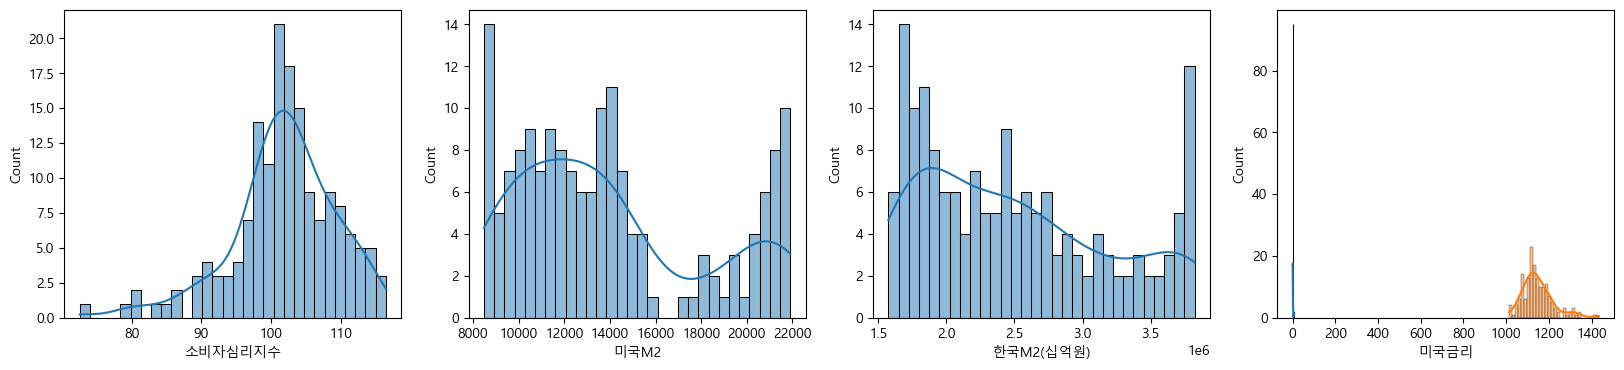

In [332]:
# 데이터 분포 확인- 히스토그램 
nrows=1
ncols=4

fig,axs=plt.subplots(nrows, ncols)
fig.set_size_inches(20,4)

sns.histplot(x=X_selected.columns[0], data=X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x=X_selected.columns[1], data=X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x=X_selected.columns[2], data=X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x=X_selected.columns[3], data=X_selected, kde=True, bins=30, ax=axs[3])


sns.histplot(x=y, data=y.to_frame(), kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\n달러원종가:{0:.2f}'.format(y.skew()))

In [333]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr_model, X, y, scoring='neg_mean_squared_error', cv=3, return_train_score=True, return_estimator=True)
print('Scores', scores)

mse=(-1*scores['train_score'])
print('MSE:', mse)

rmse=np.sqrt(-1*scores['train_score'])
print('RMSE:', rmse)

print('RMSE 평균:{0:.3f}'.format(np.mean(rmse)))

Scores {'fit_time': array([0.00482392, 0.00297165, 0.00512671]), 'score_time': array([0.00309801, 0.00342345, 0.00298667]), 'estimator': [LinearRegression(), LinearRegression(), LinearRegression()], 'test_score': array([ -1776.14925559,   -846.56784485, -27763.63142888]), 'train_score': array([-502.9949328 , -530.41891999, -389.21656201])}
MSE: [502.9949328  530.41891999 389.21656201]
RMSE: [22.42754852 23.03082543 19.72857222]
RMSE 평균:21.729


In [334]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [335]:
!pip install lightgbm


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [336]:
from lightgbm import LGBMRegressor

lgb_model=LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 164
[LightGBM] [Info] Number of data points in the train set: 114, number of used features: 5
[LightGBM] [Info] Start training from score 1151.868423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMRegressor(random_state=42)

In [337]:
model_list=[lr_model, forest_model, lgb_model]

for model in model_list:
    model.fit(X_train, y_train)
    y_preds=model.predict(X_test)
    mse=mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2=r2_score(y_test, y_preds)
    model_name=model.__class__.__name__
    print('{0} MSE:{1:.3f}, RMSE:{2:.3f}, r2:{3:.3f}'.format(model_name, mse, rmse,r2))

LinearRegression MSE:992.342, RMSE:31.501, r2:0.848
RandomForestRegressor MSE:1315.467, RMSE:36.269, r2:0.799
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 164
[LightGBM] [Info] Number of data points in the train set: 114, number of used features: 5
[LightGBM] [Info] Start training from score 1151.868423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [344]:
X[X.columns[0:3]] = (X[X.columns[0:3]] -100) /10

In [345]:
X

,경제심리지수(순환변동치),뉴스심리지수,소비자심리지수,외국인 보유금액(조),외환보유액(천달러),미국M2,한국M2(십억원),한국금리,미국금리,경상수지,원달러시가
0,1.36,1.274,1.65,281.9,268917449,8479.15,1574215.8,2.0,0.13,1776.4,1166.08
1,1.43,0.480,1.40,277.6,265865270,8487.28,1595403.8,2.0,0.13,322.4,1159.80
2,1.47,0.775,1.39,300.8,267567135,8566.14,1607896.1,2.0,0.13,917.1,1158.00
3,1.50,1.018,1.36,315.8,274143774,8611.55,1621176.9,2.0,0.13,796.9,1129.95
4,1.51,0.773,1.37,294.4,265595927,8577.66,1630904.7,2.0,0.13,6650.4,1109.05
...,...,...,...,...,...,...,...,...,...,...,...
158,-0.78,-0.634,-0.80,648.7,401730032,21059.53,3811138.9,3.5,4.88,158.1,1323.44
159,-0.78,-0.315,-0.49,660.6,402190255,20920.88,3793259.9,3.5,4.88,792.6,1306.47
160,-0.76,-0.320,-0.20,692.2,396787900,20726.76,3785013.0,3.5,5.13,1927.2,1338.17
161,-0.73,0.060,0.07,690.3,397202408,20806.15,3801207.0,3.5,5.13,5873.7,1322.33


<Axes: >

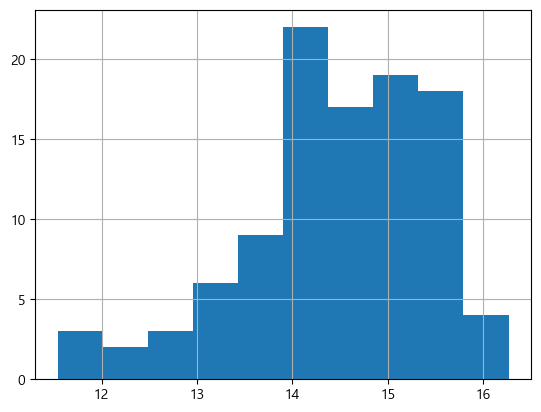

In [405]:
np.log1p(X[X.columns[4]].diff(1).dropna()).hist()

<Axes: >

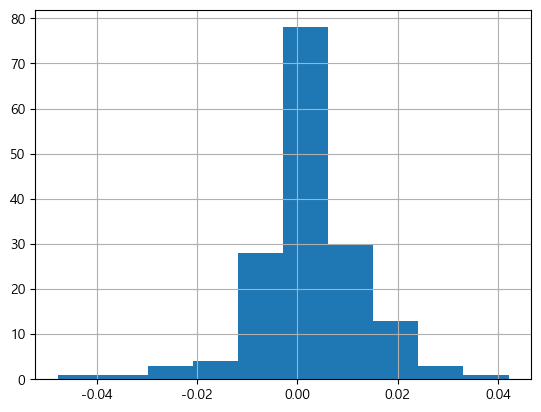

In [407]:
np.log1p(X[X.columns[4]]).diff(1).dropna().hist()

In [ ]:
loged_scaled_y = np.log1p(y)
loged_scaled_y_test = np.log1p(y_test)

In [413]:
X[X.columns[6]].diff(1).dropna()

1      21188.0
2      12492.3
3      13280.8
4       9727.8
5      17076.5
        ...   
158     4474.3
159   -17879.0
160    -8246.9
161    16194.0
162    20670.2
Name: 한국M2(십억원), Length: 162, dtype: float64

In [462]:
from scipy import stats
data = np.random.randn(100)  # 예시 데이터 (평균 0, 표준 편차 1의 표준 정규 분포에서 추출한 데이터)

# 정규성 검정 수행
statistic, p_value = stats.shapiro(np.log1p(X[X.columns[4]]).diff(1))

# 결과 출력
alpha = 0.05  # 유의수준 설정 (일반적으로 0.05 사용)
print(p_value)
if p_value < alpha:
    print("데이터는 정규 분포를 따르지 않습니다.")
else:
    print("데이터는 정규 분포를 따를 가능성이 있습니다.")


1.0
데이터는 정규 분포를 따를 가능성이 있습니다.


151
0.23259267210960388
데이터는 정규 분포를 따를 가능성이 있습니다.


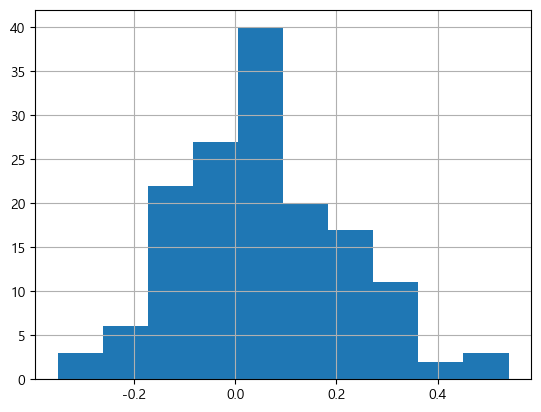

In [489]:
a = np.log1p(X[X.columns[3]]).diff(12).dropna()
print(len(a))
a.hist()

statistic, p_value = stats.shapiro(a)

alpha = 0.05  # 유의수준 설정 (일반적으로 0.05 사용)
print(p_value)
if p_value < alpha:
    print("데이터는 정규 분포를 따르지 않습니다.")
else:
    print("데이터는 정규 분포를 따를 가능성이 있습니다.")

In [459]:
len(np.log1p(X[X.columns[4]]).diff(1).diff(12).dropna())

150

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('weight:', lr_model.coef_)
print('bias:', lr_model.intercept_)
# 이건 뭐에 대한 score 인가?? 
score =lr_model.score(X_test, y_test)

print('선형회귀 모델 R2: {0:.2f}'.format(score))
score

weight: [ 5.96375931e+00 -6.91581565e+00  2.94854880e-01 -1.84899753e-01
 -1.02365209e-06 -1.82821201e-02  2.54513074e-04 -1.57780181e+00
 -1.10697935e+01  5.43077110e-04  4.47953377e-01]
bias: 731.5596531979495
선형회귀 모델 R2: 0.90


0.9001748892883291

In [380]:
coef=pd.Series(data=np.round(lr_model.coef_,5), index=X.columns)
coef

경제심리지수(순환변동치)     5.96376
뉴스심리지수           -6.91582
소비자심리지수           0.29485
외국인 보유금액(조)      -0.18490
외환보유액(천달러)       -0.00000
미국M2             -0.01828
한국M2(십억원)         0.00025
한국금리             -1.57780
미국금리            -11.06979
경상수지              0.00054
원달러시가             0.44795
dtype: float64

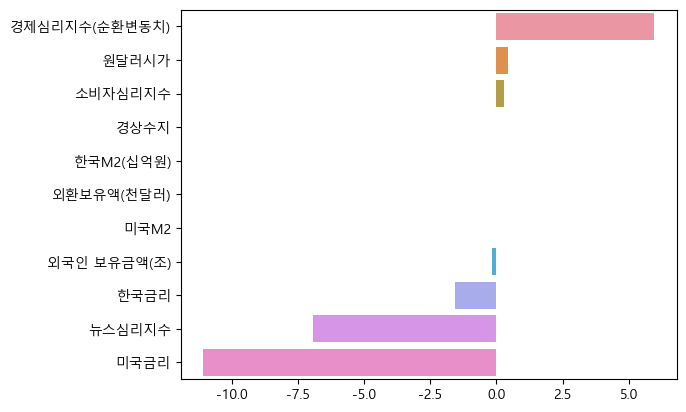

In [381]:
# 이 시각화는 왜 이모냥인겁니까?? 
coef_sort=coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.show()
# 단위가 달라서 회귀계수는 큰 의미 없다.

In [382]:
def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    r2=r2_score(y_test, y_pred)
    print('MSE:{0:3f}, RMSE:{1:.3f}, r2:{2:.3f}'.format(mse,rmse,r2))

y_pred=lr_model.predict(X_test)
printRegressorResult(y_test,y_pred)

MSE:644.254992, RMSE:25.382, r2:0.900


In [384]:
X_train

,경제심리지수(순환변동치),뉴스심리지수,소비자심리지수,외국인 보유금액(조),외환보유액(천달러),미국M2,한국M2(십억원),한국금리,미국금리,경상수지,원달러시가
84,-0.28,-0.301,-0.67,501.1,364576158,13292.82,2417807.6,1.25,0.63,3401.7,1206.85
2,1.47,0.775,1.39,300.8,267567135,8566.14,1607896.1,2.00,0.13,917.1,1158.00
94,0.11,1.653,1.32,634.4,377544543,13818.13,2521786.3,1.50,1.13,7474.3,1118.42
45,-0.17,-0.373,0.63,437.3,332411299,10932.80,1908557.6,2.50,0.13,10724.0,1074.08
42,-0.33,-0.409,0.44,385.3,318890987,10677.52,1890728.6,2.50,0.13,6964.6,1141.90
...,...,...,...,...,...,...,...,...,...,...,...
71,-0.52,0.301,0.31,420.4,358513845,12422.68,2246070.1,1.50,0.38,8042.5,1160.59
106,-0.41,-0.694,-0.34,532.9,392777742,14242.10,2692974.8,1.75,2.13,5130.6,1141.18
14,1.01,-0.325,-0.12,395.2,293641562,8998.90,1677475.9,3.00,0.13,2438.3,1127.40
92,0.08,0.089,0.85,613.0,374836165,13699.13,2492388.2,1.25,1.13,12337.7,1124.86
